<a href="https://colab.research.google.com/github/shahjamanbadhon/machine-learning-practice/blob/main/K_Means_Clustering_Market_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = '/content/drive/MyDrive/ML Practice/data/Mall_Customers.csv'
df = pd.read_csv(data)

In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
df.rename(columns={'Gender':'gender','Age':'age','Annual Income (k$)':'income','Spending Score (1-100)':'score'},inplace=True)

In [10]:
df

,CustomerID,gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [11]:
df.shape

(200, 5)

In [12]:
df.isnull().values.any()

np.False_

In [14]:
df.describe()

,CustomerID,age,income,score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


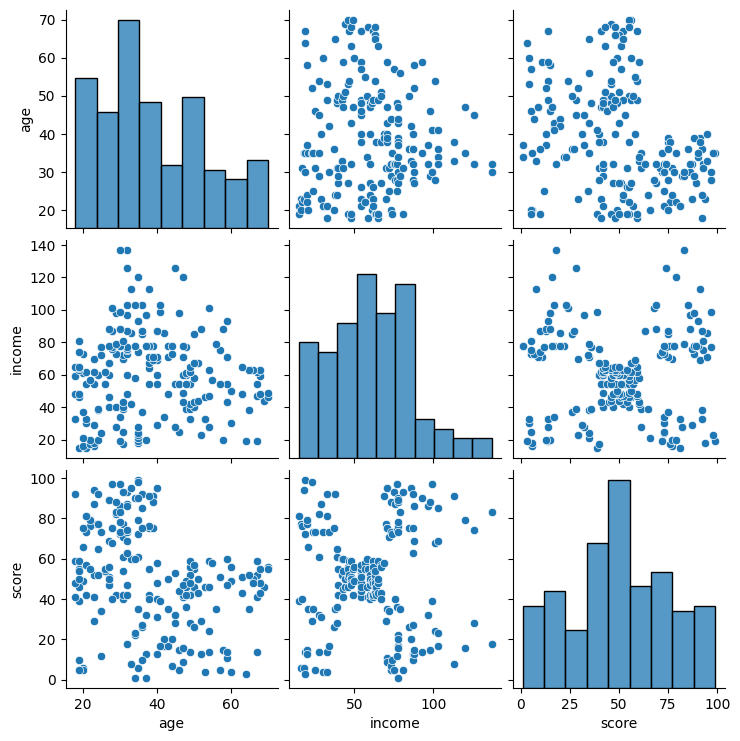

In [16]:
sns.pairplot(df[['age','income','score']])

In [18]:
import sklearn.cluster as  cluster

In [19]:
kmeans = cluster.KMeans(n_clusters=5)

In [27]:
kmeans = kmeans.fit(df[['income','score']])

In [28]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

In [29]:
df['income_clusters'] = kmeans.labels_

In [30]:
df

,CustomerID,gender,age,income,score,income_clusters
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3


In [33]:
df['income_clusters'].value_counts()

,count
income_clusters,
0,81
1,39
3,35
4,23
2,22


<Axes: xlabel='income', ylabel='score'>

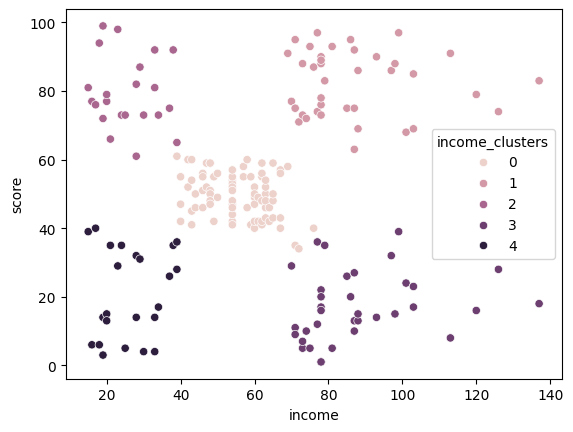

In [34]:
sns.scatterplot(data=df,x='income',y='score',hue='income_clusters')

In [39]:
kmeans = cluster.KMeans(n_clusters=2)

In [40]:
kmeans = kmeans.fit(df[['score','age']])

In [41]:
kmeans.cluster_centers_

array([[32.88695652, 46.16521739],
       [73.62352941, 28.95294118]])

In [42]:
df['age_clusters'] = kmeans.labels_

In [44]:
df['age_clusters'].value_counts()

,count
age_clusters,
0,115
1,85


<Axes: xlabel='age', ylabel='score'>

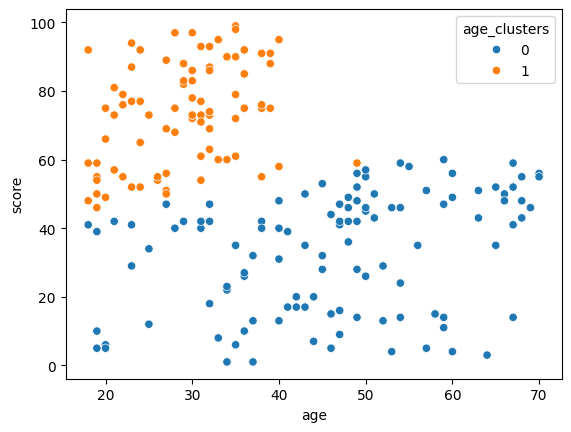

In [45]:
sns.scatterplot(data=df,x='age',y='score',hue='age_clusters')

In [46]:
K_range = range(1,12)
wcss = []

In [47]:
for k in K_range:
  km = cluster.KMeans(n_clusters=k)
  km.fit(df[['income','score']])
  wcss.append(km.inertia_)

In [48]:
wcss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73880.64496247198,
 44454.47647967972,
 37455.98455516028,
 33940.60977728412,
 29461.347393048123,
 21826.936303231643,
 24716.525287858138,
 19998.38142409119]

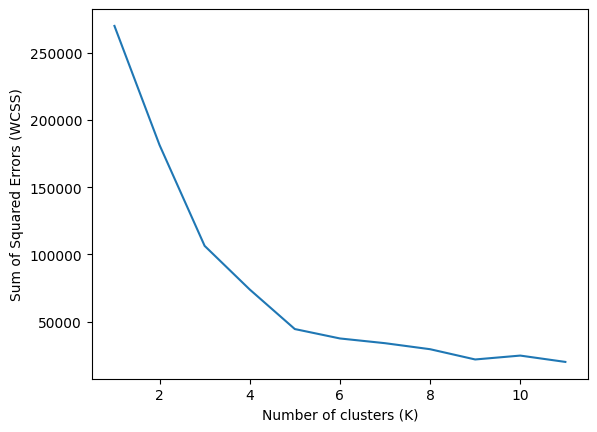

In [49]:
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of Squared Errors (WCSS)')
plt.plot(K_range,wcss)